In [3]:
import numpy.random as rd
from math import *
import matplotlib.pyplot as plt
import ipywidgets as widgets

# Série de signe aléatoire

On va étudier la série "alternée" aléatoire
$$S_0=0, \qquad S_n = \sum_{i=1}^n \frac{X_i}{i} \, ,$$
où $(X_i)_{i\geq 1}$ est une suite de variables aléatoires i.i.d. de loi $P(X_i=1) =P(X_i=-1) =\frac12$.

On commence à définir une fonction qui renvoie +1 ou -1 avec probabilité 1/2

In [4]:
def Signe():
    u=rd.random()
    if u>0.5:
        return 1
    else:
        return -1

## Représentation graphique de la suite $(S_n)_{n\geq 0}$

In [11]:
def Serie(n):
    S=[0]
    for i in range(n+1):
        S.append(S[i]+Signe()/(i+1))
    return S

On définit une fonction qui affiche le graphe de $k$ suites $(S_i)_{i\geq 0}$ jusqu'à un rang $n$ (avec au maximum $n=100$). Vous pouvez exécuter de nouveau la cellule ci-dessous, en changeant le nombre $k$ de suites (aléatoires) que l'on considère.

In [13]:
k=5            ### Nombre de suites que l'on considère
n_max=100      ### Indice maximal que l'on considère

Series1=[Serie(n_max) for i in range(k)]
def DessinSeries1(n):
    for i in range(k):
        plt.plot(Series1[i][:n+1])
    plt.title("Représentation de k={} suites (S_i) jusqu'à n={}".format(k,n))

widgets.interact(DessinSeries1,n=widgets.IntSlider(value=0,min=0,max=100,step=1))

interactive(children=(IntSlider(value=0, description='n'), Output()), _dom_classes=('widget-interact',))

<function __main__.DessinSeries(n)>

En allant plus loin, jusqu'à $n=10000$.

In [14]:
k=5            ### Nombre de suites que l'on considère
n_max=1000     ### Indice maximal que l'on considère

Series2=[Serie(n_max) for i in range(k)]
def DessinSeries2(n):
    for i in range(k):
        plt.plot(Series2[i][:n+1])
    plt.title("Représentation de k={} suites (S_i) jusqu'à n={}".format(k,n))

widgets.interact(DessinSeries2,n=widgets.IntSlider(value=10,min=0,max=n_max,step=10))

interactive(children=(IntSlider(value=10, description='n', max=1000, step=10), Output()), _dom_classes=('widge…

<function __main__.DessinSeries(n)>

## Une autre série avec un paramètre aléatoire

Cette fois, on va étudier la série "alternée" aléatoire
$$S_0=0, \qquad S_n = \sum_{i=1}^n \frac{X_i}{i^{a}} \, ,$$
où $a>0$ est un paramètre. On se demande si cette suite converge, ou plutôt pour quelles valeurs de $a$ elle converge.

In [16]:
def Serie2(a,n):
    S=[0]
    for i in range(n+1):
        S.append(S[i]+Signe()/(i+1)**a)
    return S

In [29]:
k=5            ### Nombre de suites que l'on considère

def DessinSeries(a,n):
    m=int(n)
    Series=[Serie2(a,m) for i in range(k)]
    for i in range(k):
        plt.plot(Series[i])
    plt.title("Représentation de k={} suites (S_i) jusqu'à n={}".format(k,m))

a_wid=widgets.FloatSlider(value=1,min=0.1,max=1.5,step=0.1,description='valeur de a')
n_wid=widgets.FloatLogSlider(value=1000,base=10,min=2,max=5,step=1,description='Nombre de pas n')
widgets.interact(DessinSeries,a=a_wid,n=n_wid)

interactive(children=(FloatSlider(value=1.0, description='valeur de a', max=1.5, min=0.1), FloatLogSlider(valu…

<function __main__.DessinSeries(a, n)>

## Histogramme de la loi limite

On réécrit une fonction qui ne calcule que $S_n$ (pour ne pas avoir à stocker toute la suite)

In [7]:
def serie_fin(n):
    S=0
    for i in range(n):
        S+= signe()/float(i+1)
    return S

On définit maintenant une fonction qui construit un histogramme de $k$ valeurs de $S_n$

In [8]:
def histogramme(n,k):
    echantillon=[serie_fin(n) for i in range(k)]
    plt.hist(echantillon,bins=36,range=(-3.5,3.5),density=True)

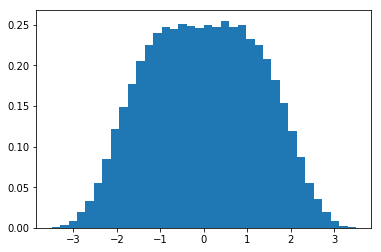

In [9]:
histogramme(1000,100000)